### Importing Dependencies

In [1]:
from random import randint as rnd
from random import shuffle
import matplotlib.pyplot as plt

### Setting The Problem and Algorithm Parameters

In [2]:
N = 6
PS = 200   #Population Size
MR = 0.8    #Mutation Rate
Epoch = 400

### Initial Population Function

In [3]:
def init_population(n, ps):
    population_list = []
    for i in range(ps):
        member = []
        for j in range(n):
            member.append(rnd(0, n-1))
        population_list.append(member+[None])
    return population_list

### Cross Over Function

In [4]:
def cross_over(population_list, n , ps):
    for i in range(0, ps, 2):
        child1 = population_list[i][:n//2] + population_list[i+1][n//2:n]+[None]
        child2 = population_list[i+1][:n//2] + population_list[i][n//2:n]+[None]
        population_list.append(child1)
        population_list.append(child2)
    return population_list

### Mutation Rate

In [5]:
def mutation(population_list, n, ps, mr):
    choosen_ones = list(range(ps, ps*2))
    shuffle(choosen_ones)
    choosen_ones = choosen_ones[:int(ps*mr)]

    for i in choosen_ones:
        cell = rnd(0, n-1)
        val = rnd(0, n-1)
        population_list[i][cell]=val
    return population_list

### Fitness Function

In [6]:
def fitness(population_list, n):
    length = len(population_list)
    for i in range(length):
        conflict = 0
        for j in range(n):
            for k in range(j+1, n):
                #column
                if population_list[i][j]==population_list[i][k]:
                    conflict+=1
                #diagnial
                if abs(j-k)==abs(population_list[i][j]-population_list[i][k]):
                    conflict+=1                  
        population_list[i][-1]=conflict
        
    return population_list

### Presentation Function

In [7]:
def show(solution, n):
    plt.figure(figsize=(5, 5))
    for i in range(n+1):
        plt.plot([0, n*2], [i*2, i*2])
        plt.plot([i*2, i*2], [0, n*2])
    for i in range(n):
        plt.scatter([i*2+1], solution[i]*2+1)
    plt.show()

### Main

1 Best solution so far:  [1, 3, 5, 2, 4, 0, 1]
2 Best solution so far:  [1, 3, 5, 2, 4, 0, 1]
3 Best solution so far:  [1, 3, 5, 2, 4, 0, 1]
4 Best solution so far:  [1, 3, 5, 2, 4, 0, 1]
5 Best solution so far:  [1, 3, 5, 2, 4, 0, 1]
6 Best solution so far:  [1, 3, 5, 2, 4, 0, 1]
7 Best solution so far:  [1, 3, 5, 2, 4, 0, 1]
8 Best solution so far:  [1, 3, 5, 2, 4, 0, 1]
9 Solution Found:  [2, 5, 1, 4, 0, 3, 0]


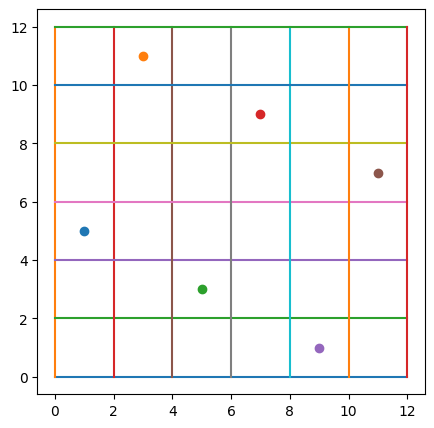

In [8]:
current_population = init_population(N, PS)
current_population = fitness(current_population, N)
current_population = sorted(current_population, key=lambda x:x[-1])
if current_population[0][-1]==0:
    print("Solution is found in the initial population stage: ", current_population[0])
    show(current_population[0], N)
else:
    for i in range(Epoch):
        current_population = cross_over(current_population, N, PS)
        current_population = mutation(current_population, N, PS, MR)
        current_population = fitness(current_population, N)
        current_population = sorted(current_population, key=lambda x:x[-1])
        current_population = current_population[:PS]
        if current_population[0][-1]==0:
            print(i+1, "Solution Found: ", current_population[0])
            show(current_population[0], N)
            break
        else:
            print(i+1, "Best solution so far: ", current_population[0])
    else:
        print("Sorry, We could not find you a solution.")